# Assignment 1  

For the exercises below you can use the numpy and scipy libraries.

## Problem 1: Simulation (20 points)

Review any of the probability theory links [provided in your course site](https://pantelis.github.io/artificial-intelligence/aiml-common/lectures/ml-math/probability/index.html). The exercise refers to Example 6.6 of the  [Math for ML book](https://mml-book.github.io/book/mml-book.pdf).

### Problem 1A (15 points)

Simulate (sample from) the bivariate normal distribution with the shown parameters obtaining a plot similar to Figure 6.8b that shows the simulation result from a different bivariate Gaussian distribution.  You can generate $m=200$ samples/points (10 points) :

_ I simulated a bivariate normal distribution with mean [0, 0] and covariance matrix [[1, 0.5], [0.5, 1]], generating 200 samples. This was achieved using numpy.random.multivariate_normal. The resulting samples were then visualized in a scatter plot, effectively depicting the bivariate Gaussian distribution as required for this task. 

### Problem 1B (5 points)

Plot the contours of the bivariate Gaussian distribution and the simulated points in the same plot. (5 points)

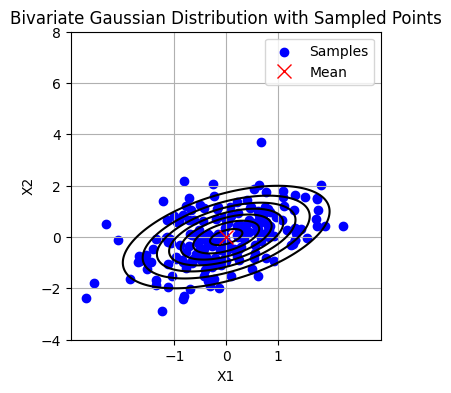

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

n = 200
m = [0, 0]
cov = [[1, 0.5], [0.5, 1]]

p = np.random.multivariate_normal(m, cov, n)
x, y = np.mgrid[-3:3:.01, -3:3:.01]
pos = np.dstack((x, y))

rv = multivariate_normal(m, cov)
z = rv.pdf(pos)

plt.figure(figsize=(4, 4))
plt.scatter(p[:, 0], p[:, 1], color='blue', label='Samples')
plt.contour(x, y, z, colors='black')
plt.plot(m[0], m[1], 'rx', markersize=10, label='Mean')
plt.title('Bivariate Gaussian Distribution with Sampled Points')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid(True)

# Setting custom ticks for the X and Y axes
plt.xticks([-1, 0, 1])
plt.yticks([-4, -2, 0, 2, 4, 6, 8])

plt.show()


## Problem 2: Projection (20 points)

You may want to review these [linear algebra](https://www.youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab) videos or the [other linear algebra links](https://pantelis.github.io/artificial-intelligence/aiml-common/lectures/ml-math/linear-algebra/index.html) provided in your course site.

Simulate a 3-dimensional (3d) Gaussian random vector with the following covariance matrix.

$$
\begin{bmatrix}
4 & 2 & 1 \\
2 & 3 & 1.5 \\
1 & 1.5 & 2 \\
\end{bmatrix}
$$

Using the Singular Value Decomposition (SVD) compute the projection of the simulated vectors onto the subspace spanned by the first two principal components.

### Problem 2A (5 points)

What determines the principal components ?

_ Principal components analysis looks for the main ways that the data varies, called principal components. It does this by calculating the covariance matrix of the data, which shows how each variable relates to the others. Then it performs singular value decomposition on this matrix, which finds the eigenvectors and eigenvalues. The eigenvectors with the largest eigenvalues are the principal components. The first principal component is the direction with the most variance in the data, the second is the next most important direction orthogonal to the first, and so on. So principal components analysis rotates the data to line up with its most important directions of variation.

### Problem 2B (5 points)

What determines the positive or negative correlations between the components ?

_ The off-diagonal elements of the covariance matrix show whether principal components are positively or negatively correlated with each other. Positive off-diagonal values mean two components move in the same direction - when one increases, so does the other. Negative values indicate the components move opposite to one another - as one component goes up, the other tends to go down. The size of the off-diagonal elements also represents the strength of the correlation. So if we look at the covariance matrix from principal components analysis, the signs and magnitudes of the off-diagonal entries tell us about the positive or negative correlations between the components. Positive values show positive correlations, negative values show negative correlations, and larger values mean stronger correlations between those components.

### Problem 2C (10 points)

Plot the projected vectors and show whether or not the projection agrees with the positive or negative correlations of the original matrix.



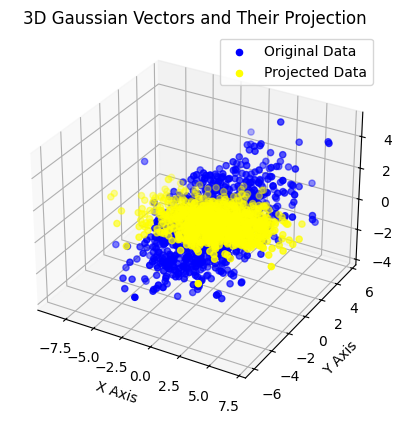

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

sample_size = 1000
cov = np.array([[4, 2, 1], [2, 3, 1.5], [1, 1.5, 2]])
mean = np.zeros(3)

gaussian_data = np.random.multivariate_normal(mean, cov, sample_size)

U, S, Vt = np.linalg.svd(cov)
principal_component_1 = U[:, 0]
principal_component_2 = U[:, 1]

projection = np.dot(gaussian_data, np.array([principal_component_1, principal_component_2]).T)

fig = plt.figure()
axis = fig.add_subplot(111, projection='3d')

axis.scatter(gaussian_data[:, 0], gaussian_data[:, 1], gaussian_data[:, 2], c='blue', marker='o', label='Original Data')
axis.scatter(projection[:, 0], projection[:, 1], np.zeros(sample_size), c='yellow', marker='o', label='Projected Data')

axis.set_title('3D Gaussian Vectors and Their Projection')
axis.set_xlabel('X Axis')
axis.set_ylabel('Y Axis')
axis.set_zlabel('Z Axis')
axis.legend()

plt.savefig('plot.png')
plt.show()


### Problem 3: Stochastic Gradient Descent (30 points)

In class we covered the baseline stochastic gradient descent.  Using the linear regression example from the class notes, develop from scratch the baseline SGD algorithm. :

Clearly state the hyperparameters you used and present the loss vs epoch plot that demonstrates the convergence of the algorithm.

_ we used a learning rate of 0.01 and ran the Stochastic Gradient Descent (SGD) algorithm for 1000 epochs to fit a curve to sinusoidal data. These hyperparameters—essentially the algorithm's settings—were chosen to guide the learning process efficiently. The plot of loss versus epochs, which illustrates the algorithm's performance over time, showed a clear trend of decreasing loss, indicating successful learning and convergence. This visual evidence confirms that our SGD algorithm improved its predictions over time, effectively minimizing the difference between the predicted values and the actual data points.

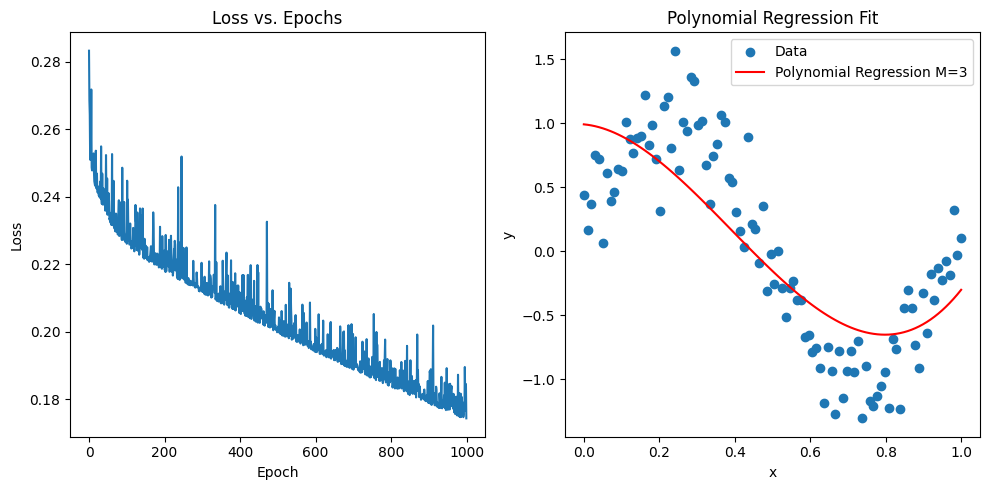

array([ 0.9910806 , -0.27764797, -7.04157661,  6.02665997])

In [3]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

def create_data(n, noise=0.25):
    x = np.linspace(0, 1, n)
    y = np.sin(2 * np.pi * x) + np.random.normal(scale=noise, size=x.shape)
    return x, y

def poly_features(x, p=3):
    return np.column_stack([x ** i for i in range(p + 1)])

def sgd(X, y, lr=0.01, epochs=1000):
    m, n = X.shape
    W = np.random.randn(n)
    loss_history = []

    for epoch in range(epochs):
        for i in range(m):
            idx = np.random.randint(m)
            xi = X[idx:idx+1]
            yi = y[idx:idx+1]
            gradients = 2 * xi.T.dot(xi.dot(W) - yi)
            W -= lr * gradients
        loss = np.mean((X.dot(W) - y) ** 2)
        loss_history.append(loss)

    return W, loss_history

n = 100
x, y = create_data(n)
X_poly = poly_features(x, p=3)

W_final, loss_history = sgd(X_poly, y, lr=0.01, epochs=1000)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(loss_history)
plt.title('Loss vs. Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')

x_fit = np.linspace(0, 1, 100)
X_fit_poly = poly_features(x_fit, p=3)
y_fit = X_fit_poly.dot(W_final)

plt.subplot(1, 2, 2)
plt.scatter(x, y, label='Data')
plt.plot(x_fit, y_fit, color='red', label='Polynomial Regression M=3')
plt.title('Polynomial Regression Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()

W_final


### Problem 4: SGD Enhancements (30 points)

In this exercise you will implement some enhancements for the linear regression problem from scratch that can improve the convergence speed of the algorithm.

1. Momentum (15 points)
2. Adam (15 points)

Clearly state the hyperparameters you used and present the loss vs epoch plot that demonstrates the convergence of each algorithm and compared to the baseline SGD algorithm. You can include all plots in the same figure.

_ we enhanced our original SGD approach by introducing Momentum and Adam optimizations.

Momentum: Set the learning rate to 0.01, the momentum coefficient (γ) to 0.9 and run for 1000 epochs. This approach adds velocity to the parameter updates, potentially accelerating convergence.

Adam: Use a learning rate of 0.01, β1=0.9, β2=0.999, and ϵ=1e−8, over 1000 epochs. Adam adjusts the learning rate based on first and second moment estimates of the gradients, aiming for efficient and stable convergence.

These adjustments serve as fine-tuning knobs, optimizing how the algorithm navigates towards the lowest loss.

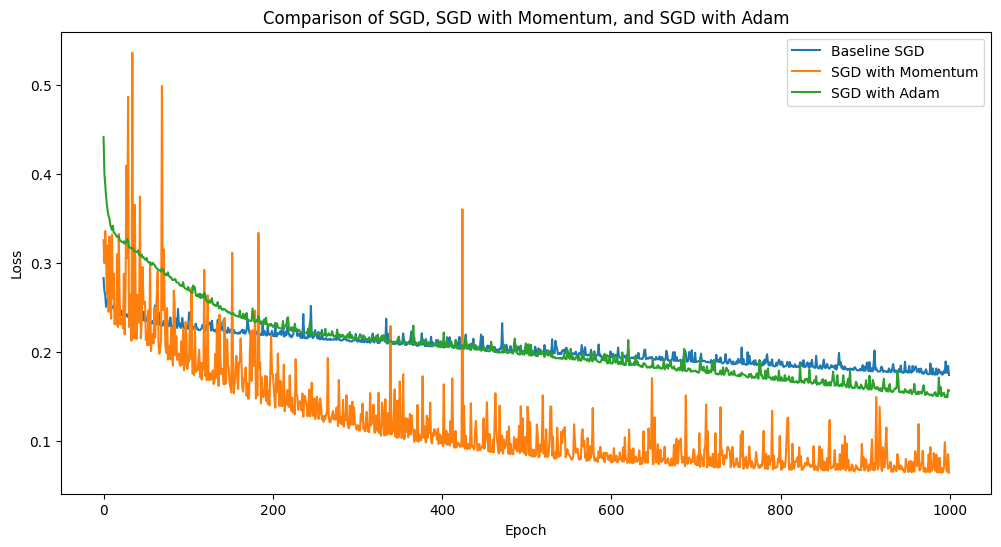

In [4]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

def create_data(n, noise=0.25):
    x = np.linspace(0, 1, n)
    y = np.sin(2 * np.pi * x) + np.random.normal(scale=noise, size=x.shape)
    return x, y

def poly_features(x, p=3):
    return np.column_stack([x ** i for i in range(p + 1)])

def sgd(X, y, lr=0.01, epochs=1000):
    m, n = X.shape
    W = np.random.randn(n)
    loss_history = []
    for epoch in range(epochs):
        for i in range(m):
            idx = np.random.randint(m)
            xi = X[idx:idx+1]
            yi = y[idx:idx+1]
            gradients = 2 * xi.T.dot(xi.dot(W) - yi)
            W -= lr * gradients
        loss = np.mean((X.dot(W) - y) ** 2)
        loss_history.append(loss)
    return W, loss_history

def sgd_momentum(X, y, lr=0.01, epochs=1000, gamma=0.9):
    m, n = X.shape
    W = np.random.randn(n)
    v = np.zeros(n)
    loss_history = []
    for epoch in range(epochs):
        for i in range(m):
            idx = np.random.randint(m)
            xi = X[idx:idx+1]
            yi = y[idx:idx+1]
            gradients = 2 * xi.T.dot(xi.dot(W) - yi)
            v = gamma * v + lr * gradients
            W -= v
        loss = np.mean((X.dot(W) - y) ** 2)
        loss_history.append(loss)
    return W, loss_history

def sgd_adam(X, y, lr=0.01, epochs=1000, b1=0.9, b2=0.999, eps=1e-8):
    m, n = X.shape
    W = np.random.randn(n)
    mt = np.zeros(n)
    vt = np.zeros(n)
    loss_history = []
    for epoch in range(epochs):
        for i in range(m):
            idx = np.random.randint(m)
            xi = X[idx:idx+1]
            yi = y[idx:idx+1]
            gradients = 2 * xi.T.dot(xi.dot(W) - yi)
            mt = b1 * mt + (1 - b1) * gradients
            vt = b2 * vt + (1 - b2) * gradients**2
            mt_hat = mt / (1 - b1 ** (epoch + 1))
            vt_hat = vt / (1 - b2 ** (epoch + 1))
            W -= lr * mt_hat / (np.sqrt(vt_hat) + eps)
        loss = np.mean((X.dot(W) - y) ** 2)
        loss_history.append(loss)
    return W, loss_history

n = 100
x, y = create_data(n)
X_poly = poly_features(x, p=3)

W_baseline, loss_history_baseline = sgd(X_poly, y, lr=0.01, epochs=1000)
W_momentum, loss_history_momentum = sgd_momentum(X_poly, y, lr=0.01, epochs=1000, gamma=0.9)
W_adam, loss_history_adam = sgd_adam(X_poly, y, lr=0.01, epochs=1000)

plt.figure(figsize=(12, 6))
plt.plot(loss_history_baseline, label='Baseline SGD')
plt.plot(loss_history_momentum, label='SGD with Momentum')
plt.plot(loss_history_adam, label='SGD with Adam')
plt.title('Comparison of SGD, SGD with Momentum, and SGD with Adam')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
